In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('Ecommerce Customers')
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [12]:
df.columns.to_list()

['Email',
 'Address',
 'Avatar',
 'Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

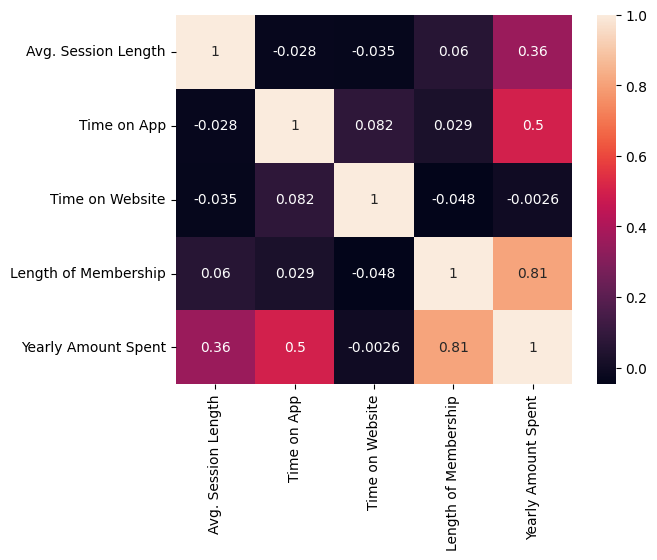

In [20]:
numerical_df = df.select_dtypes(include='number')
correlation = numerical_df.corr()

sns.heatmap(correlation,
            annot=True)
plt.show()

#Exploratory Data Analysis



Here, let's observe distribution trend based on correlation value (lowest and highest).

Pearson correlation coefficient: -0.002640844672158924
P-value: 0.9530290603518248


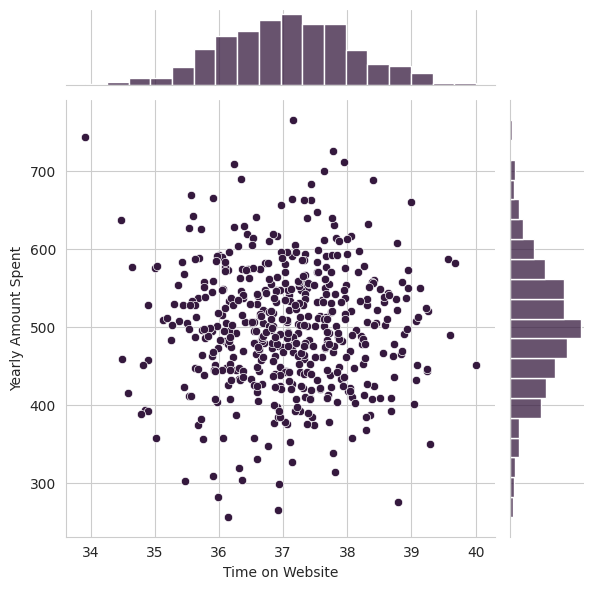

In [35]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(df['Time on Website'], df['Yearly Amount Spent'])
print(f'Pearson correlation coefficient: {pearson_corr}')
print(f'P-value: {p_value}')

sns.set_palette('rocket')
sns.set_style('whitegrid')

sns.jointplot(
    data=df,
    x='Time on Website',
    y='Yearly Amount Spent',
)

plt.show()

Pearson correlation coefficient: 0.809083568247581
P-value: 4.8066157825846074e-117


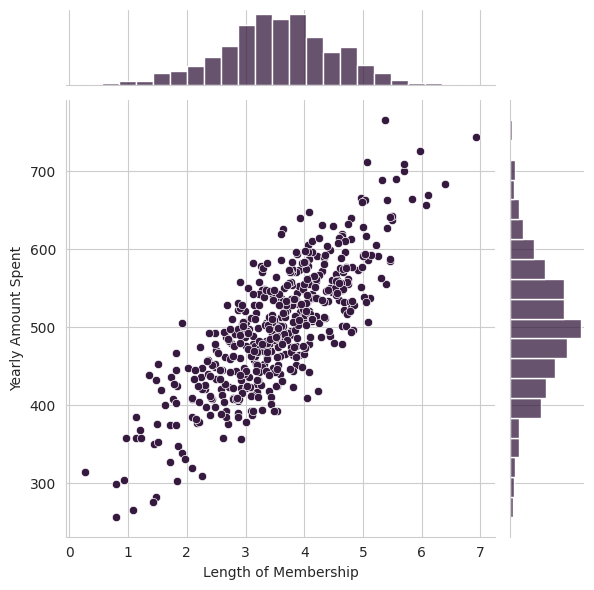

In [41]:
pearson_corr, p_value = pearsonr(df['Length of Membership'], df['Yearly Amount Spent'])
print(f'Pearson correlation coefficient: {pearson_corr}')
print(f'P-value: {p_value}')

sns.jointplot(
    data=df,
    x='Length of Membership',
    y='Yearly Amount Spent',
)

plt.show()

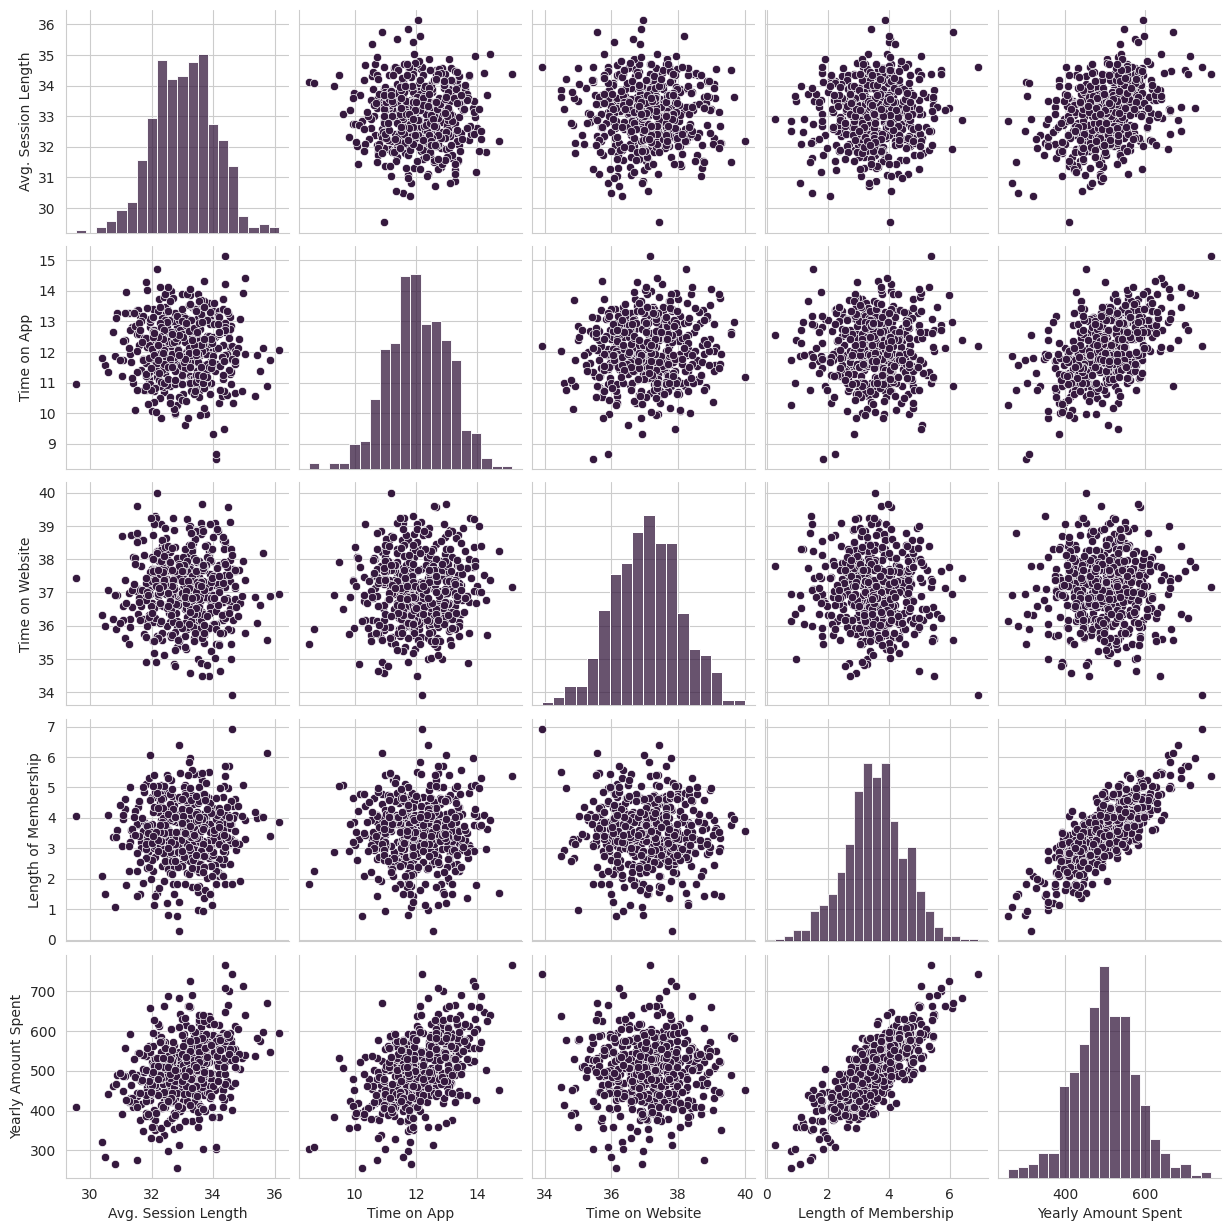

In [38]:
sns.set_palette('rocket')
sns.set_style('whitegrid')

sns.pairplot(df)
plt.show()

Based on the plot, we could identify that Length of Membership is the most correlated with Yearly Amount Spend.



# Linear Regression

We will create linear plot Yearly Amount Spent and Length of Membership

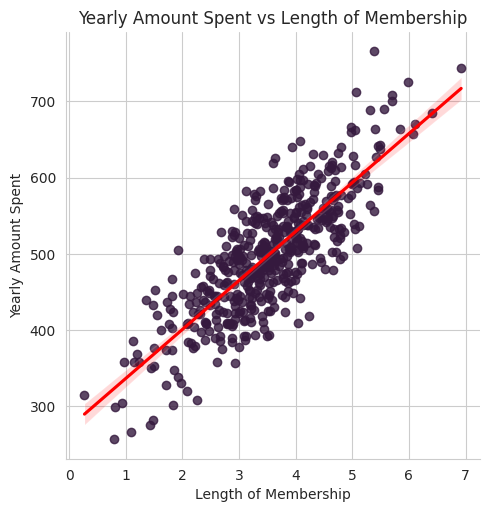

In [45]:
sns.lmplot(
    data=df,
    x='Length of Membership',
    y='Yearly Amount Spent',
    line_kws={'color': 'red'}
)

plt.title('Yearly Amount Spent vs Length of Membership')
plt.show()

#Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets

In [60]:
x = df['Yearly Amount Spent'].values.reshape(-1, 1)
y = df[['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']]

In [67]:
 from sklearn.model_selection import train_test_split

 x_train, x_test, y_train, y_test = train_test_split(
     x,
     y,
     test_size = 0.3,
     random_state=101
 )

Training the model

In [68]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [69]:
coefficient = lm.coef_
coefficient

print('Coefficient:')
print(coefficient)

Coefficient:
[[0.00434387]
 [0.00598912]
 [0.0002244 ]
 [0.01040701]]


#Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [77]:
prediction = lm.predict(x_test)
prediction

array([[32.82763324, 11.75664621, 37.07087229,  3.05867739],
       [32.60486878, 11.44950917, 37.0593647 ,  2.52497944],
       [32.64412202, 11.50362966, 37.06139245,  2.61902214],
       [33.46657425, 12.63758765, 37.10387877,  4.58944893],
       [33.40901707, 12.55823055, 37.10090548,  4.45155372],
       [33.18889126, 12.25473157, 37.08953419,  3.92417747],
       [33.42012318, 12.57354313, 37.1014792 ,  4.4781617 ],
       [33.95738864, 13.31429918, 37.12923331,  5.76533951],
       [32.87359986, 11.82002279, 37.07324684,  3.16880396],
       [33.1769197 , 12.23822575, 37.08891577,  3.89549606],
       [32.28492057, 11.0083798 , 37.04283678,  1.75844917],
       [33.00243543, 11.99765514, 37.07990224,  3.47746755],
       [33.2230314 , 12.30180237, 37.09129781,  4.00597024],
       [32.6167439 , 11.46588201, 37.05997814,  2.55342978],
       [34.18814406, 13.63245377, 37.1411537 ,  6.31818214],
       [33.19916633, 12.26889834, 37.09006498,  3.94879442],
       [33.94235391, 13.

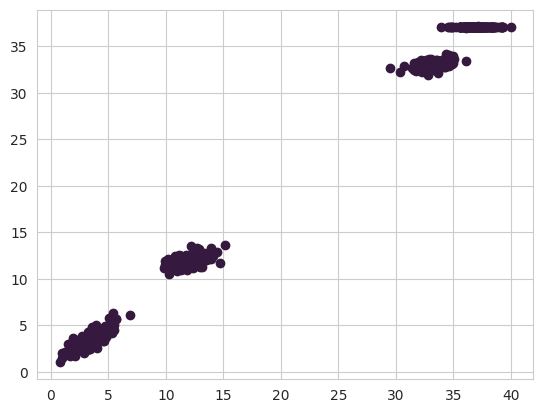

In [78]:
plt.scatter(y_test, prediction)
plt.show()